In [1]:
import os
import sys
import yaml
import glob
import tqdm
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



In [2]:
df = pd.read_pickle("./evb.pkl")
df

,rc0,rc,H11,H22
0,0.07,0.684116,0.000000,-171.864293
1,0.07,0.683225,0.000000,-171.851718
2,0.07,0.690933,0.000000,-171.734797
3,0.07,0.694656,0.000000,-171.686774
4,0.07,0.694979,0.000000,-171.644514
...,...,...,...,...
11999995,-0.07,-0.613467,-165.775788,0.000000
11999996,-0.07,-0.669661,-164.306466,0.000000
11999997,-0.07,-0.730245,-165.216333,0.000000
11999998,-0.07,-0.706263,-166.342609,0.000000


<AxesSubplot:>

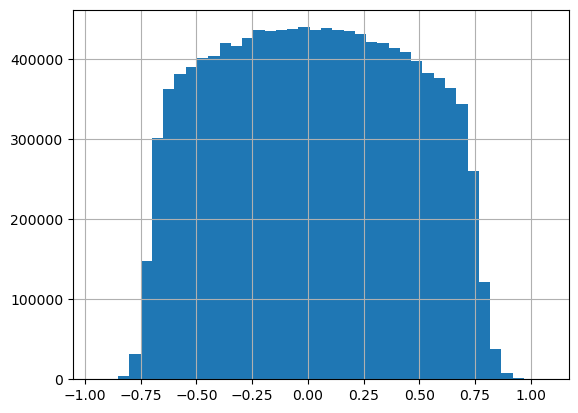

In [3]:
df.rc.hist(bins=40)

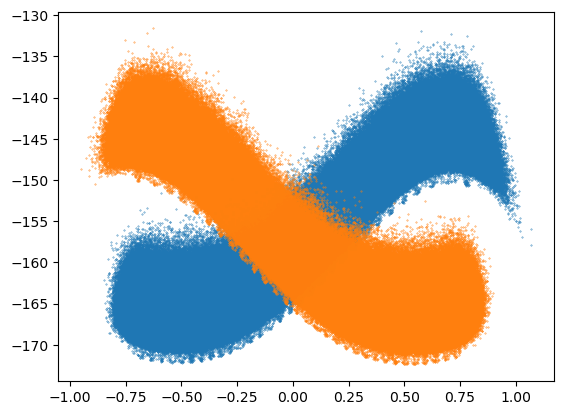

In [4]:
df_h11 = df[df.H11 != 0]
df_h22 = df[df.H22 != 0]

plt.scatter(df_h11.rc, df_h11.H11,s=.1)
plt.scatter(df_h22.rc, df_h22.H22,s=.1)
# plt.ylim([-200, 0])
# plt.xlim([-1.5, 1.5])

In [15]:
hist, bin_edges = np.histogram(df.rc, bins=200)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

In [16]:
hist, bin_edges = np.histogram(df_h11.rc, bins=bin_edges)

In [17]:
def cal_hmean(df, h_name, bins=100): 
    hist, bin_edges = np.histogram(df.rc, bins=bins)
    ind_h = np.digitize(df.rc, bin_edges)
    h_rc = np.zeros(len(bin_edges) + 1)
    for ind, h in zip(ind_h, df[h_name]): 
        h_rc[ind] += h
    h_rc = h_rc[1:-1] / hist
    return h_rc 

hist, bin_edges = np.histogram(df.rc, range=(-.8, .8), bins=50)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

h11 = cal_hmean(df_h11, 'H11', bins= bin_edges)
h22 = cal_hmean(df_h22, 'H22', bins= bin_edges)
# inds_h22 = np.digitize(df_h22.rc, be)

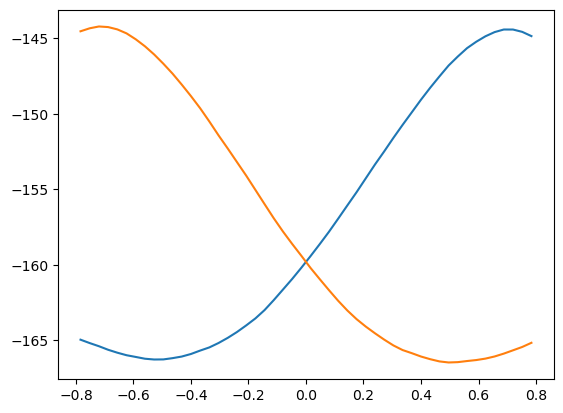

In [18]:
plt.plot(bin_centers, h11)
plt.plot(bin_centers, h22)

In [19]:
def cal_eg(H11, H22, H12): 
    return 0.5 * (H11 + H22 - np.sqrt((H11-H22)**2 + 4*H12**2))

eg = cal_eg(h11, h22, 11.5)

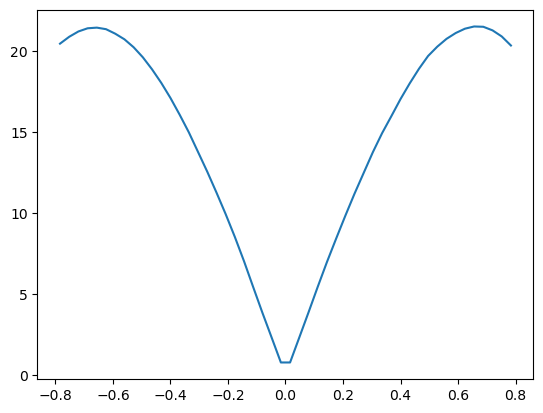

In [20]:
# plt.plot(bin_centers, h11)
plt.plot(bin_centers, np.abs(h11- h22))
# plt.plot(bin_centers, eg)

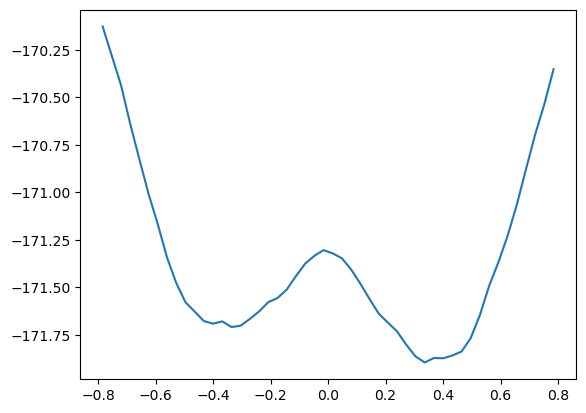

In [21]:
plt.plot(bin_centers, eg)